(3, 3)


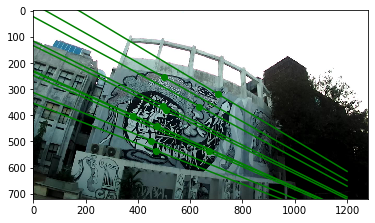

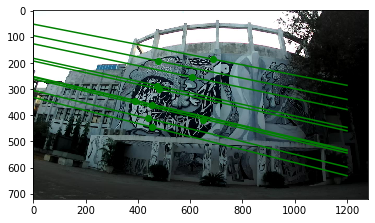

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
F= np.array([[-1.29750186e-06,  8.07894025e-07,  1.84071967e-03],
             [3.54098411e-06,  1.05620725e-06, -8.90168709e-03],
             [-3.29878312e-03,  5.14822628e-03,  1.00000000e+00]])
img1 = np.array([[381,402,1],
 [452,497,1],
 [671,538,1],
 [501,254,1],
 [506,381,1],
 [474,440,1],
 [471,537,1],
 [498,364,1],
 [706,319,1],
 [635,367,1]])
print(F.shape)
f= F.transpose()
img2= np.array([[390,346,1],
 [439,412,1],
 [651,417,1],
 [477,194,1],
 [482,300,1],
 [456,359,1],
 [454,444,1],
 [475,287,1],
 [686,185,1],
 [606,253,1]])



E1= np.zeros((10,3))
for i in range(10):
    E1[i]= np.matmul(f,img2[i])

E2= np.zeros((10,3))
for i in range(10):
#     E2[i]= np.matmul(img1[i],F)
    E2[i]= np.matmul(F,img1[i])
    
Ep1 = np.zeros((10,2))
for i in range(10):
    Ep1[i] = [(E1[i][0]/E1[i][1]),(E1[i][2]/E1[i][1])]
    Ep1[i][1] =Ep1[i][1]
    
Ep1 *= -1
Ep2 = np.zeros((10,2))
for i in range(10):
    Ep2[i] = [(E2[i][0]/E2[i][1]),(E2[i][2]/E2[i][1])]
    Ep2[i][1] =Ep2[i][1]
Ep2 *= -1    
    

y1=np.zeros((10,1200))
x = np.zeros((1200,1))
for i in range(1200):
    x= np.linspace(0,1200,1200)
img=mpimg.imread('img1.jpg') 
for i in range(10):
    y1[i] = Ep1[i][0]*x + Ep1[i][1] 
    plt.plot(img1[i][0],img1[i][1],'go')
    plt.plot(x, y1[i], '-g')
plt.imshow(img)
plt.show()

y2=np.zeros((10,1200))
x = np.zeros((1200,1))
for i in range(1200):
    x= np.linspace(0,1200,1200)
img=mpimg.imread('img2.jpg') 
for i in range(10):
    y2[i] = Ep2[i][0]*x + Ep2[i][1] 
    plt.plot(x, y2[i], '-g')
    plt.plot(img2[i][0],img2[i][1],'go')
plt.imshow(img)
plt.show()

In [10]:
#Epipole Calculation
#Epipole of first image is found by taking SVD of F
(U, W, V) = np.linalg.svd(F, full_matrices=True)
V=V.transpose()
ep1=V[:,-1]
print("epipole for first image is",ep1)
#Epipole of second image is found by taking SVD of transpose of F
(P, Q, R) = np.linalg.svd(f, full_matrices=True)
R=R.transpose()

ep2=R[:,-1]
print("epipole for second image is",ep2)

epipole for first image is [8.75919893e-01 4.82456398e-01 4.05675052e-04]
epipole for second image is [-9.83333374e-01 -1.81811546e-01  1.91611592e-04]
